**Partie II — Utilisation de R**

Exercice 1  — Modèle Logistique Simple

1. Charger et afficher les données regroupées en classe d'âge.

In [126]:
data <- read.table("MCV.txt", header=TRUE)
data_by_age <- split(data, data$AGRP)
data_by_age


,ID,AGRP,AGE,CHD
,<int>,<int>,<int>,<int>
1,1,1,20,0
2,2,1,23,0
3,3,1,24,0
4,4,1,25,0
5,5,1,25,1
6,6,1,26,0
7,7,1,26,0
8,8,1,28,0
9,9,1,28,0


2. On souhaite étudier la relation entre CHD et la variable explicative AGE. Afficher les 
données à l’aide d’un nuage de points. Commenter la Figure. 

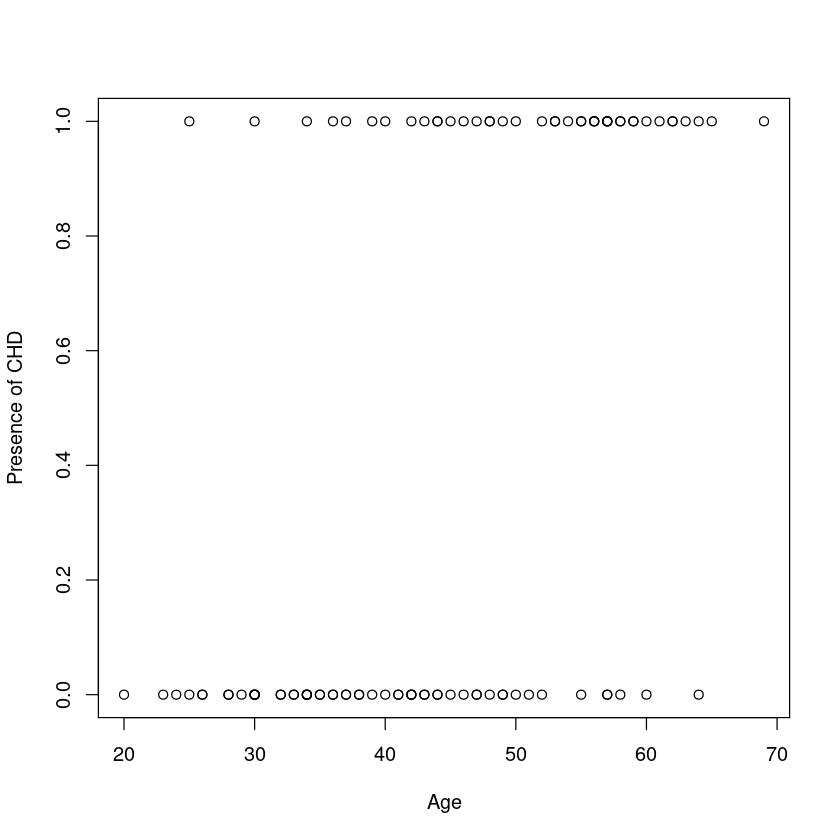

In [127]:
plot(data$AGE, data$CHD, xlab="Age", ylab="Presence of CHD")


La tendance générale montre une relation positive entre l'âge et la présence de maladie cardiovasculaire, ce qui suggère une corrélation positive entre les deux variables. 

3. Calculons la proportion de malades observée selon les classes d’âge définies par la 
variable  AGRP.  Définir  un  vecteur  centre  qui  donne  les  centres  de  chaque  classe 
puis  représenter  le  nuage  de  points  de  p  versus  centre.  Y  a-t-il  une  liaison  entre 
CHD  et  AGE  ?  Quelle  est  la  forme  de  ce  graphique  ?  Quel  est  son  intérêt 
comparativement au graphique précédant ? Quel modèle suggérez-vous d’utiliser ?

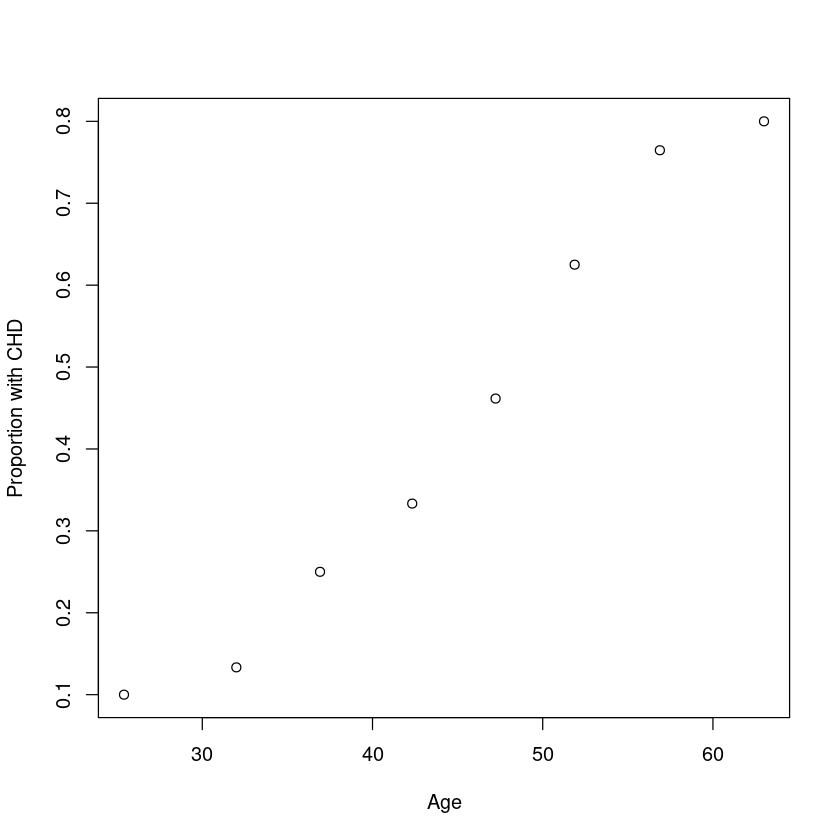

In [128]:
proportions <- tapply(data$CHD, data$AGRP, mean)


center <- tapply(data$AGE, data$AGRP, mean)
plot(center, proportions, xlab="Age", ylab="Proportion with CHD")


Le graphique montre la proportion de malades pour chaque classe d’âge. Il montre également la relation entre CHD et AGE pour chaque classe d’âge. Le graphique est utile pour voir comment la proportion de malades varie en fonction de l’âge. Il suggère également qu’il y a une relation non linéaire entre les deux variables. Pour modéliser cette relation, vous pouvez utiliser une régression logistique.

4. Commençons  pour  ajuster  une  régression  logistique  de  CHD  en  fonction  de  AGE. 
Commenter les résultats (tests de significativité, nombre de degrés de liberté).

In [129]:
model <- glm(CHD ~ AGE, data = data, family = binomial)
summary(model)



Call:
glm(formula = CHD ~ AGE, family = binomial, data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9718  -0.8456  -0.4576   0.8253   2.2859  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -5.30945    1.13365  -4.683 2.82e-06 ***
AGE          0.11092    0.02406   4.610 4.02e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 136.66  on 99  degrees of freedom
Residual deviance: 107.35  on 98  degrees of freedom
AIC: 111.35

Number of Fisher Scoring iterations: 4


Cela va ajuster un modèle de régression logistique en utilisant la fonction "glm", avec la variable CHD comme variable réponse et l'âge comme variable explicative. En examinant le résumé des résultats, on peut voir que l'âge est significativement associé à la présence de maladie cardiovasculaire (p < 0,05). Le nombre de degrés de liberté pour la variable AGE est de 1, ce qui correspond au fait qu'il n'y a qu'une seule variable explicative continue dans ce modèle.

5. Afin de mieux discerner les relations entre les différentes classes, il est demandé de 
représenter sur un même graphique les proportions selon la classe d’âge et la courbe 
logistique ajustée.

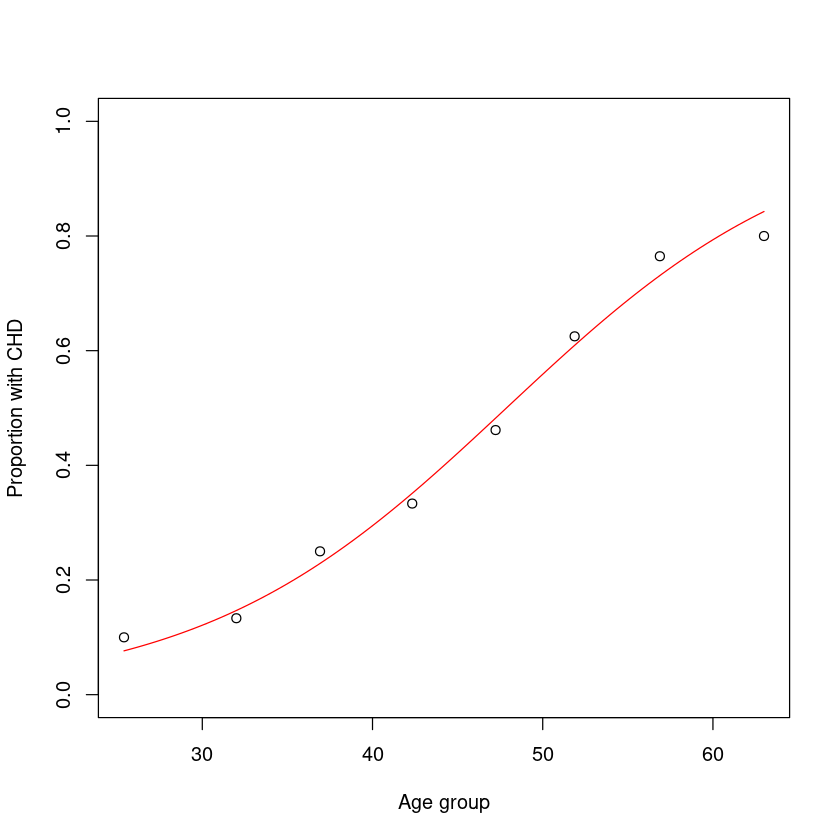

In [130]:
plot(center, proportions, xlab = "Age group", ylab = "Proportion with CHD", ylim = c(0, 1))
curve(predict(model, data.frame(AGE = x), type = "response"), add = TRUE, col = "red")


6. Ajuster de même le modèle “probit” puis comparer les deux modèles. Commenter 
les résultats.

In [131]:
library(MASS)
model2 <- glm(CHD ~ AGE, data = data, family = binomial(link = probit))
summary(model2)



Call:
glm(formula = CHD ~ AGE, family = binomial(link = probit), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9713  -0.8608  -0.4499   0.8358   2.3269  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.14573    0.62460  -5.036 4.74e-07 ***
AGE          0.06580    0.01335   4.930 8.20e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 136.66  on 99  degrees of freedom
Residual deviance: 107.50  on 98  degrees of freedom
AIC: 111.5

Number of Fisher Scoring iterations: 4


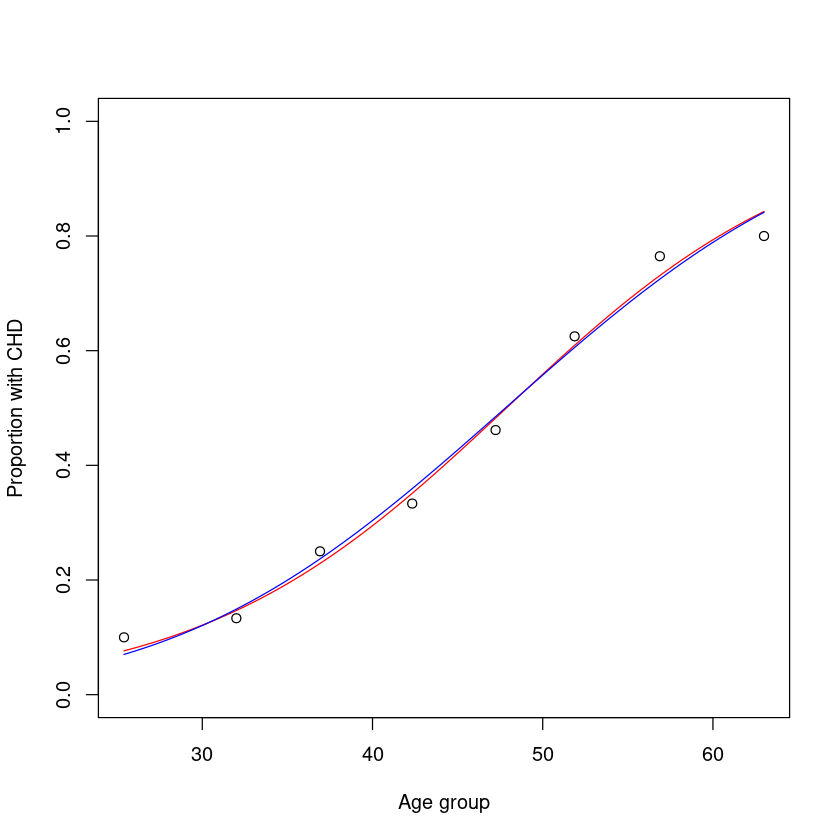

In [132]:
plot(center, proportions, xlab = "Age group", ylab = "Proportion with CHD", ylim = c(0, 1))
curve(predict(model, data.frame(AGE = x), type = "response"), add = TRUE, col = "red")
curve(predict(model2, data.frame(AGE = x), type = "response"), add = TRUE,col="blue")

Cela correspondra à un modèle de régression probit, qui est similaire au modèle de régression logistique mais utilise une fonction de lien différente pour transformer le prédicteur linéaire en probabilité.

7. Estimer,  dans  chacun  des  deux  modèles  la  cote  d’un  individu  âgés  de  30  ans. 
Commenter. Estimer le rapport de cotes correspondant à la variable AGE. 

In [133]:
newdata <- data.frame(AGE = 30) 

# Logistic regression
logit_pred <- predict(model, newdata, type = "link")
odds_logit <- exp(logit_pred)
odds_ratio_logit <- exp(coef(model)["AGE"])

# Probit regression
probit_pred <- predict(model2, newdata, type = "link")
odds_probit <- exp(probit_pred)
phi <- dnorm(0) # standard normal density at 0
odds_ratio_probit <- phi * coef(model2)["AGE"]
vs<-c(odds_ratio_logit,odds_ratio_probit)
vs


AGE        AGE 
1.11730680 0.02625209